In [70]:
f = open("all_comments.txt", "r")
text = f.read()


Clean text from punctuation, so to leave only alpha numeric characters.


In [71]:
import re
# import string
# text.translate(str.maketrans('', '', string.punctuation))
import re, string
# pattern = re.compile('[\W_]+')
# pattern.sub('', string.printable)
# text = re.sub(pattern,' ', text)

In [72]:
text = text.lower()
text

'if you correctly guessed what all of those products were just by looking at the painting you spend too much time on this sub and we are besties  that’s seriously super cool. i need that hanging in my bathroom.\n i had to do an autobiographical still life for my painting class, and thought of my skincare routine, naturally.\n\nproducts:\n\n* vanicream moisturizer\n* elta md uv clear spf 46\n* timeless vitamin c\n* curology\n\nskincare goals:\n\nprotect and defend/have good skin at 50 years old that\'s the best shelfie i\'ve seen on this sub. is that vanicream? love that stuff. such a good painting! [deleted] oh i love this. you should sell these!  ohhhhh. i love this.  this is the first shelfie i actually want to compliment. really well done! i\'m been on this sub so long that i recognized all of the products xd love the timeless! it’s the best.  beautiful use of light and shadow! adore this i absolutely love this. thank you for sharing!! looove it! good good one! <3 yay! some of my fa

In [73]:
import pandas as pd
skincare_products = pd.read_csv("cosmetic_p.csv")
brands = [brand.lower() for brand in skincare_products.brand.values]
products = [product.lower() for product in skincare_products.name.values]

In [74]:
freqs_products = {}
freqs_brands = {}

for brand in brands:
    if brand in text and not (brand in freqs_brands):
        count = text.count(brand)
        freqs_brands[brand] = count

for product in products:
    if product in text and not (product in freqs_products):
        count = text.count(product)
        freqs_products[product] = count

In [75]:
print(len(freqs_brands))
print(len(freqs_products))


59
84


In [76]:
print(freqs_brands)
print(freqs_products)

{'la mer': 25, 'sk-ii': 10, 'drunk elephant': 69, 'it cosmetics': 8, 'tatcha': 137, 'fresh': 143, 'belif': 16, 'sunday riley': 46, 'farmacy': 23, 'first aid beauty': 26, 'clinique': 110, 'bareminerals': 2, 'shiseido': 11, 'origins': 18, 'olehenriksen': 5, 'josie maran': 14, 'laneige': 55, 'glow recipe': 30, 'herbivore': 3, 'tarte': 351, 'caudalie': 10, 'youth to the people': 7, 'biossance': 7, 'estée lauder': 1, 'son & park': 2, 'amorepacific': 2, 'smashbox': 1, 'glamglow': 9, 'peter thomas roth': 9, 'jack black': 18, 'philosophy': 18, 'perricone md': 7, 'lancôme': 6, 'murad': 17, 'dior': 4, 'kopari': 1, 'clarins': 1, 'lancer': 2, "l'occitane": 1, 'kate somerville': 8, 'saturday skin': 3, 'milk makeup': 8, 'tata harper': 1, 'go-to': 17, 'boscia': 5, 'indie lee': 4, 'too faced': 1, 'nuface': 4, 'klorane': 6, 'clarisonic': 5, 'dermadoctor': 2, 'becca': 1, 'foreo': 3, 'coola': 10, 'omorovicza': 1, 'summer fridays': 1, 'wander beauty': 1, 'ilia': 37, 'urban decay': 3}
{'the water cream': 2

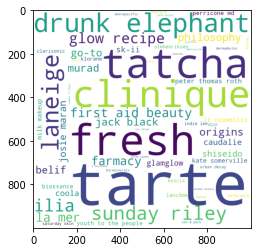

In [77]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_brands = WordCloud(background_color="white",width=1000,height=1000, relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqs_brands)
plt.imshow(wc_brands)

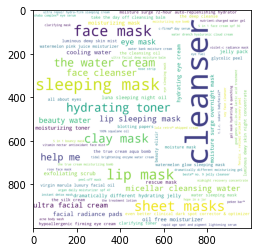

In [78]:
wc_products = WordCloud(background_color="white",width=1000,height=1000, relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqs_products)
plt.imshow(wc_products)


{'the water cream': 20, 'lala retro™ whipped cream': 1, 'virgin marula luxury facial oil': 2, 'ultra facial cream': 7, 'midnight recovery concentrate': 1, 'the true cream aqua bomb': 2, 'luna sleeping night oil': 3, 'moisture surge 72-hour auto-replenishing hydrator': 2, 'the true cream moisturizing bomb': 1, 'water sleeping mask': 2, 'water bank moisture cream': 1, 'luminous dewy skin mist': 2, 'dramatically different moisturizing gel': 1, 'watermelon glow sleeping mask': 2, 'tidal brightening enzyme water cream': 1, 'beauty elixir': 2, 'beauty water': 8, 'the silk cream': 2, 'luminous dewy skin night concentrate': 2, 'water drench hyaluronic cloud cream': 1, 'argan daily moisturizer spf 47': 1, 'watermelon pink juice moisturizer': 2, 'dramatically different hydrating jelly': 3, 'vitamin nectar antioxidant face mist': 1, 'ultra repair hydra-firm sleeping cream': 1, '100% squalane oil': 1, 'oil free moisturizer': 4, 'sleeping mask': 43, 'cooling water': 5, 'moisture surge overnight mas

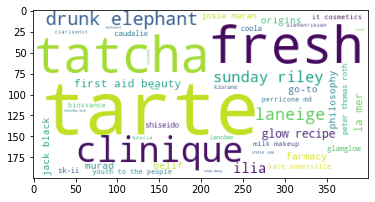

In [79]:
wc = WordCloud(background_color="white", relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqs_brands)
plt.imshow(wc)

print(freqs_products)

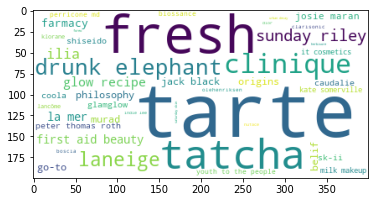

In [80]:
wc = WordCloud(background_color="white", relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(freqs_brands)
plt.imshow(wc)

<BarContainer object of 59 artists>

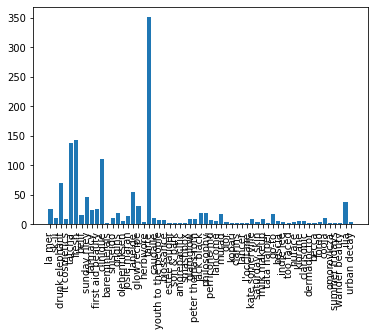

In [81]:
keys = freqs_brands.keys()
values = freqs_brands.values()

plt.xticks(rotation=90)
plt.bar(keys, values)

In [84]:
# popular = skincare_products.loc[ "cleanser" in skincare_products.name.values]
popular = skincare_products[(skincare_products['name'].str.lower().str).contains("cleanser")]
popular

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
133,Moisturizer,IT COSMETICS,Miracle Water 3-in-1 Micellar Cleanser,38,4.5,"Water, Dipropylene Glycol, Peg-6 Caprylic/Capr...",1,1,1,1,1
300,Cleanser,FRESH,Soy Face Cleanser,38,4.4,"Water, Coco-Glucoside, Glycerin, Butylene Glyc...",0,0,0,0,0
302,Cleanser,PHILOSOPHY,Purity Made Simple Cleanser,24,4.5,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",1,1,1,1,1
311,Cleanser,FIRST AID BEAUTY,Face Cleanser,20,4.4,"Water, Sodium Cocoyl Isethionate, Glycerin, St...",1,1,1,1,1
317,Cleanser,DRUNK ELEPHANT,Beste™ No. 9 Jelly Cleanser,34,4.1,"Water, Sodium Lauroyl Methyl Isethionate, Glyc...",1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
567,Cleanser,MURAD,Refreshing Cleanser,39,4.4,"Water, Sodium Laureth Sulfate, Disodium Lauret...",0,0,0,0,0
568,Cleanser,KIEHL'S SINCE 1851,Blue Herbal Acne Cleanser Treatment,22,3.5,"Water, Coco-Glucoside, Propylene Glycol, Ammon...",1,0,0,1,0
573,Cleanser,CLARISONIC,Refreshing Gel Cleanser,19,5.0,"Water, Glycerin, Coco-Betaine, Sodium Cocoyl G...",1,1,1,1,1
577,Cleanser,REN CLEAN SKINCARE,Micro Polish Cleanser,32,4.5,Citrus Aurantium Bergamia (Bergamot) Leaf Extr...,0,0,0,0,0
